# Credit Loan Approval Prediction

In [ ]:
# !pip install scikit-learn==1.4.2

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

First, load the dataset attained from Kaggle.

In [ ]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

From the code cell above, we can know that each of the column name is preceded by a space. Therefore, we rename the columns' name without the space.

In [ ]:
df.columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

## EDA

Let's see the statistical information of the dataset.

In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Next, we need to check whether there are any null values in the dataset.

In [ ]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Good news, there aren't any null values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### About Loan Status

The `loan_status` shows whether a loan application is accepted or rejected. This is the variable that we are going to predict.

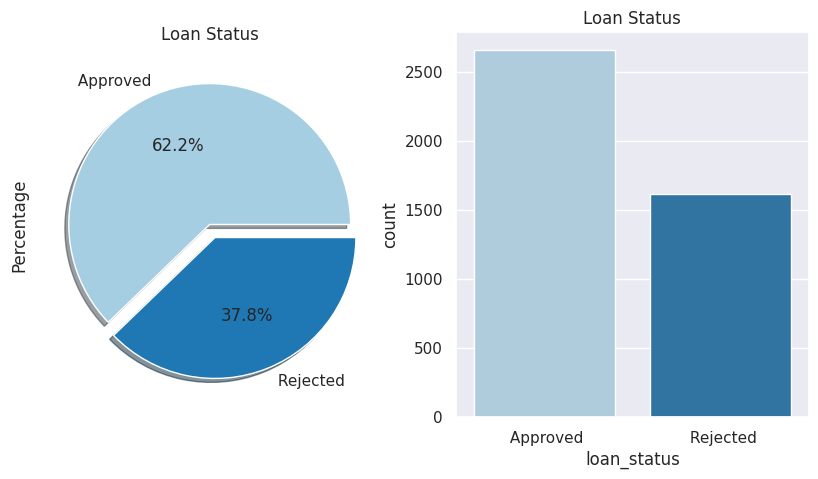

In [ ]:
sns.set_theme(palette="Paired")
f, ax = plt.subplots(1, 2, figsize=(10, 5))
df['loan_status'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Loan Status')
ax[0].set_ylabel('Percentage')
sns.countplot(x='loan_status', data=df, hue='loan_status', ax=ax[1])
ax[1].set_title('Loan Status')
plt.show()

The graphs above show that around **two third** of the loan application are **accepted**.

Now, let's check the relation between each variable to loan_status variable. Here, the loan_status variable is the target or independent variable which we are going to predict.

### Relation Between `education` and `loan_status`

First, let's see the value distribution of `education`.

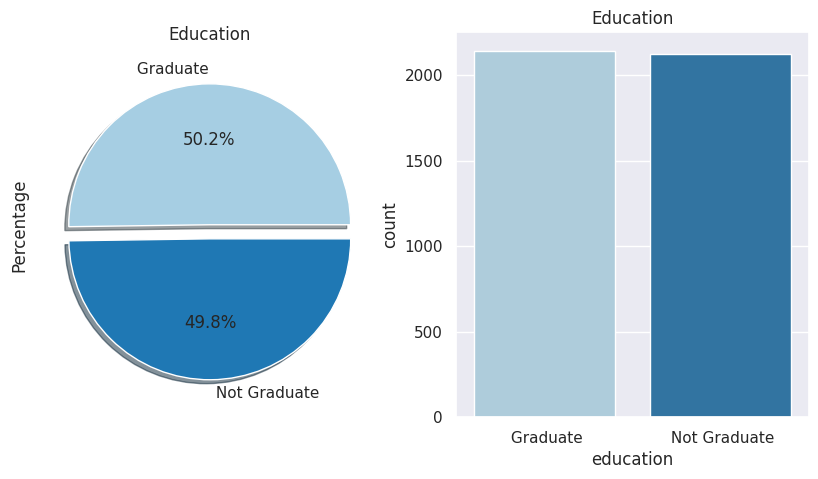

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
df['education'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Education')
ax[0].set_ylabel('Percentage')
sns.countplot(x='education', data=df, hue='education', ax=ax[1])
ax[1].set_title('Education')
plt.show()

From the graphs above, we can clearly see that the number of graduate applicants and non-graduate applicants is almost equal.

Now, let us see the relation between `education` and `loan_status`.

In [ ]:
pd.crosstab(df["education"], df["loan_status"], normalize='columns').style.background_gradient(axis=None, cmap='mako')

loan_status,Approved,Rejected
education,,
Graduate,0.504142,0.499070
Not Graduate,0.495858,0.500930


In [ ]:
pd.crosstab(df["education"], df["loan_status"], normalize='index').style.background_gradient(axis=None, cmap='mako')

loan_status,Approved,Rejected
education,,
Graduate,0.624534,0.375466
Not Graduate,0.619765,0.380235


From the first and second crosstab, we can see that the status of graduation does not really affects the outcome of `loan_status`. Both of the graduate and non-graduate applicants have similar possibility to be accepted (around 62%) or rejected (around 37%).

### Relation Between `self_employed` and `loan_status`

First, let's see the value distribution of `self_employed`.

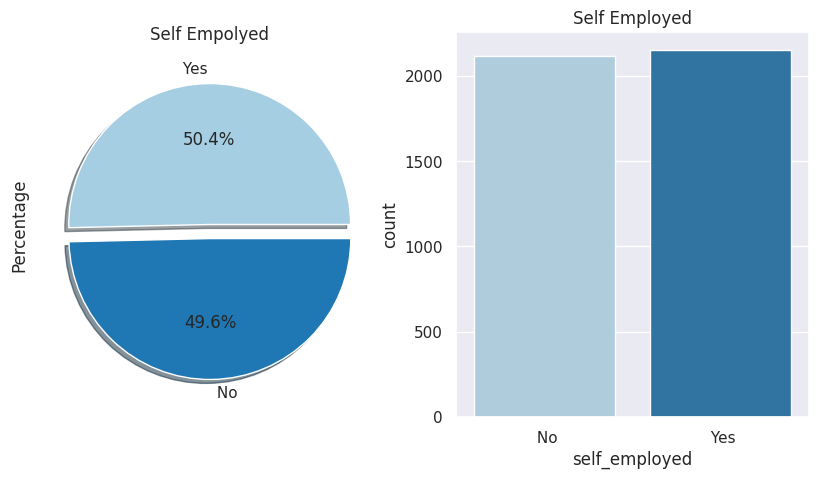

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
df['self_employed'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Self Empolyed')
ax[0].set_ylabel('Percentage')
sns.countplot(x='self_employed', hue='self_employed', data=df, ax=ax[1])
ax[1].set_title('Self Employed')
plt.show()

Half of the applicants are self-employed and half of them are not.

Now, let us see the relation between `self_employed` and `loan_status`.

In [ ]:
pd.crosstab(df["self_employed"], df["loan_status"], normalize='columns').style.background_gradient(axis=None, cmap='mako')

loan_status,Approved,Rejected
self_employed,,
No,0.496235,0.496590
Yes,0.503765,0.503410


From the crosstab above, we can conclude that the status of self employment does not affect the `loan_status` outcome since both of the approved and rejected applications consisted of almost equal percentage of self-employed and non-self-employed applicants.

In [ ]:
pd.crosstab(df["self_employed"], df["loan_status"], normalize='index').style.background_gradient(axis=None, cmap='mako')

loan_status,Approved,Rejected
self_employed,,
No,0.621992,0.378008
Yes,0.622326,0.377674


From the second crosstab above, we can conclude the possibility of an application is being approved is around 62% and the possibility of it being rejected is around 37%, despite its `self_employed` status.

Thus, the variable `self_employed` is similar to `education`. Let's try to see the relationship between those two.

In [ ]:
pd.crosstab([df.self_employed, df.education], df.loan_status).style.background_gradient(cmap='mako')

The education status does not effect the number of self-employed applicants. In conclusion, the variable `self_employed` and `education` are independent of each other.

### Relation Between `no_of_dependents` and `loan_status`

First, let's see the value distribution of `no_of_dependents`.

In [ ]:
df['no_of_dependents'].value_counts()

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

As we can see, `no_of_dependents` is evenly distributed.

Now, let us see the relation between `no_of_dependents` and `loan_status`.

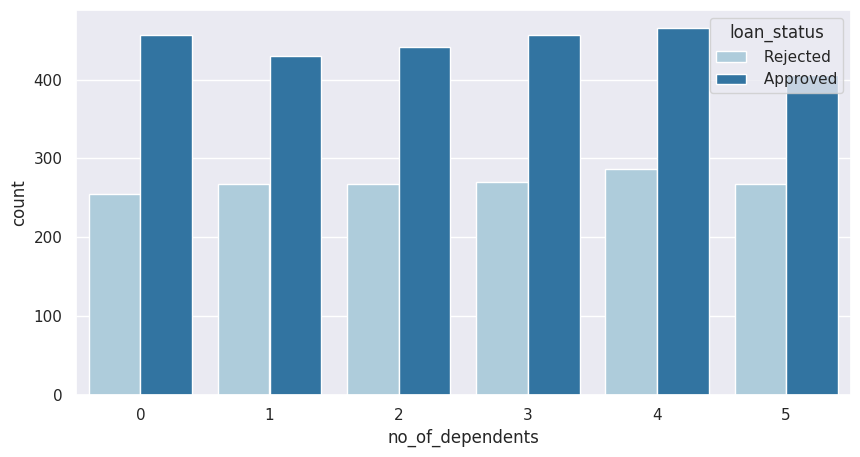

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="no_of_dependents", hue="loan_status")
plt.show()

In [ ]:
pd.crosstab(df.no_of_dependents, df.loan_status, normalize='index').style.background_gradient(cmap='mako')

loan_status,Approved,Rejected
no_of_dependents,,
0,0.641854,0.358146
1,0.616930,0.383070
2,0.622881,0.377119
3,0.628611,0.371389
4,0.618351,0.381649
5,0.603269,0.396731


It seems like the number of dependents does not determine the outcome of `loan_status`. We can see that each number of dependents have around 62% approval possibility and 38% rejection possibility. However, the table also shows that if there is zero number of dependents, there is a slightly higher change of approval.

### Relation Between `income_annum` and `loan_status`

Let's see the distribution of the `income_annum`.

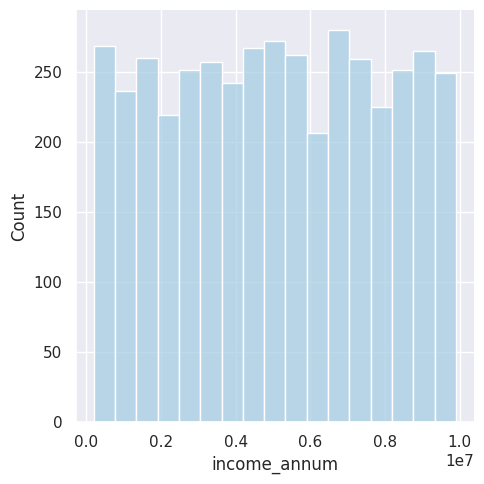

In [ ]:
sns.displot(df, x="income_annum")

Now, let's find out the relation between `income_annum` and `loan_status`.

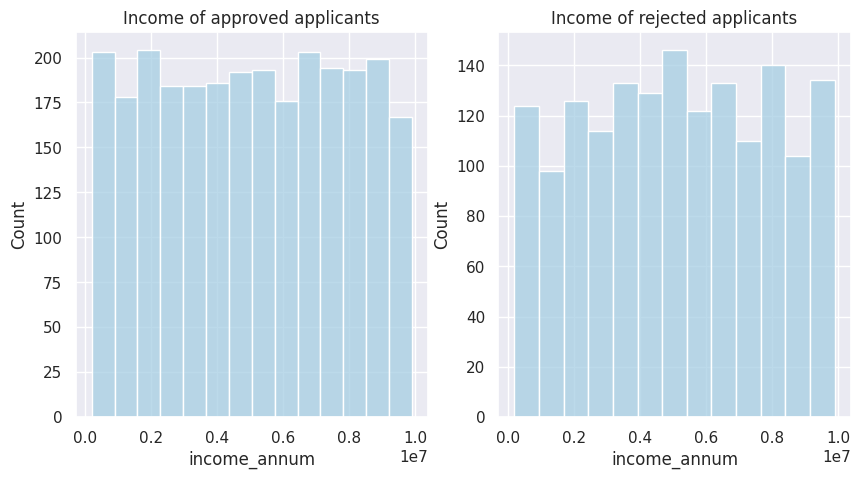

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df[df['loan_status']==' Approved'].income_annum, ax=ax[0])
ax[0].set_title('Income of approved applicants')
sns.histplot(df[df['loan_status']==' Rejected'].income_annum, ax=ax[1])
ax[1].set_title('Income of rejected applicants')
plt.show()

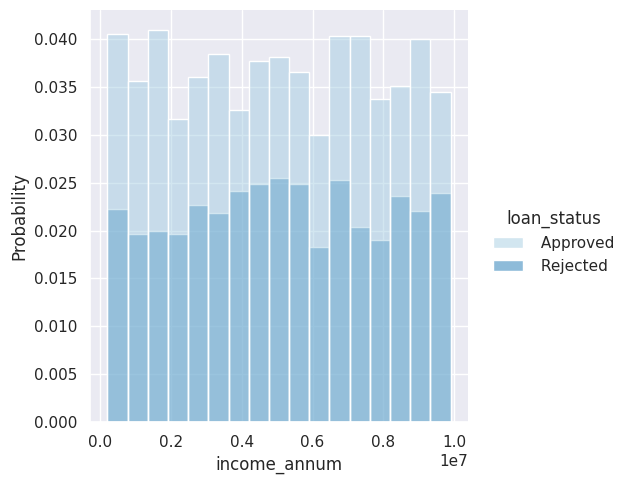

In [ ]:
sns.displot(df, x="income_annum", hue="loan_status", stat="probability")

From the two graphs above, it can be seen that accross all the `income_annum`, the probability for both approved and rejected applications varies. We can see that `income_annum` does not effect `loan_status`.

### Relation between `loan_amount` and `loan_status`

Let's see the distribution of `loan_amount`.


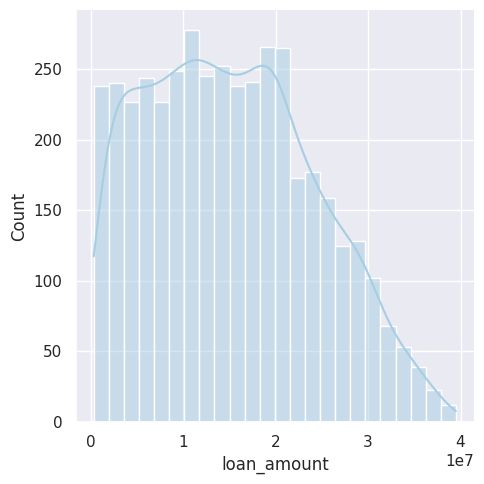

In [ ]:
sns.displot(df, x="loan_amount", kde=True)

Now, let's find out the relation between `loan_amount` and  `loan_status`.

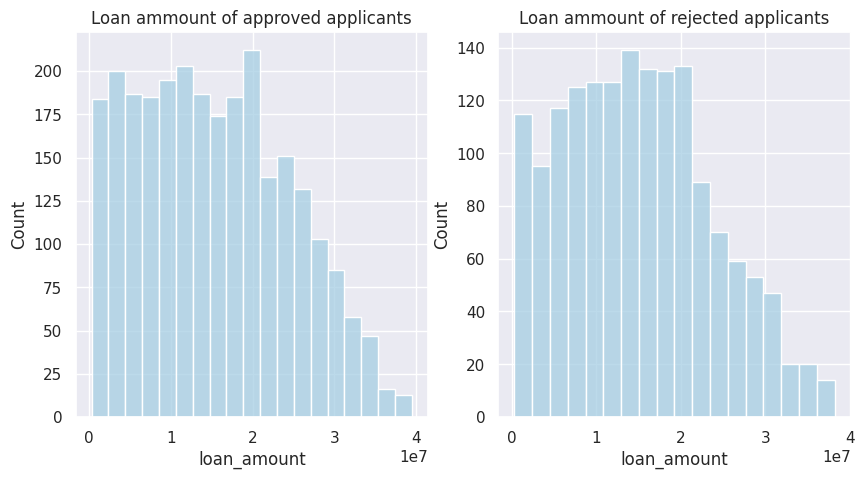

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df[df['loan_status'] == ' Approved'].loan_amount, ax=ax[0])
ax[0].set_title('Loan ammount of approved applicants')
sns.histplot(df[df['loan_status'] == ' Rejected'].loan_amount, ax=ax[1])
ax[1].set_title('Loan ammount of rejected applicants')
plt.show()

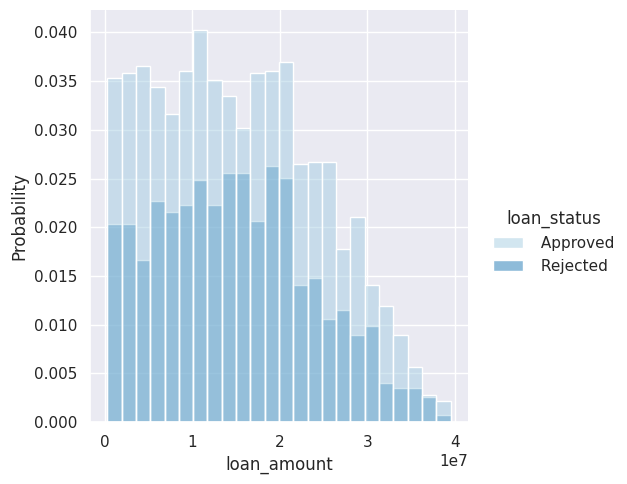

In [ ]:
sns.displot(df, x="loan_amount", hue="loan_status", stat="probability")

Overall, the probability of being approved is still higher than the probability of being rejected across all values of `loan_amount`. As the `loan_amount` becomes higher in the right end, the approval and rejection probability decrease.

### Relation between `loan_term` and `loan_status`.

Let's see the distribution of the `loan_term`.

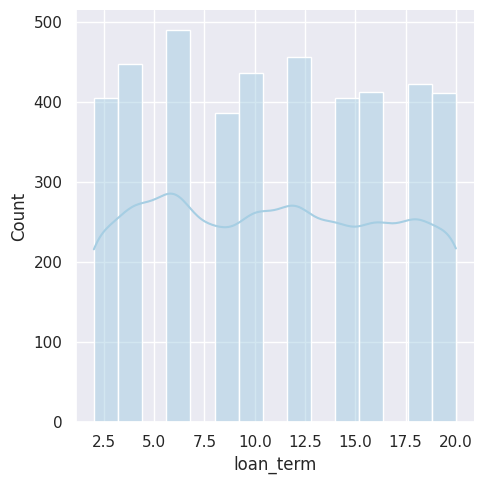

In [ ]:
sns.displot(df, x="loan_term", kde=True)

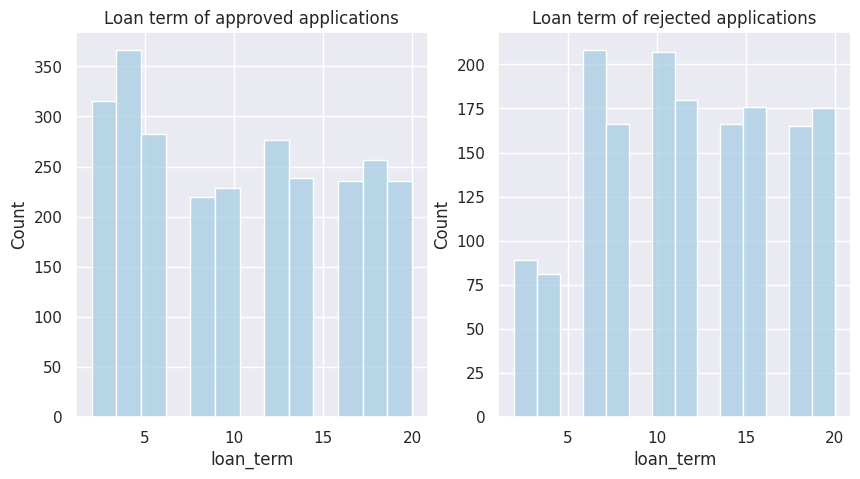

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df[df['loan_status'] == ' Approved'].loan_term, ax=ax[0])
ax[0].set_title('Loan term of approved applications')
sns.histplot(df[df['loan_status'] == ' Rejected'].loan_term, ax=ax[1])
ax[1].set_title('Loan term of rejected applications')
plt.show()

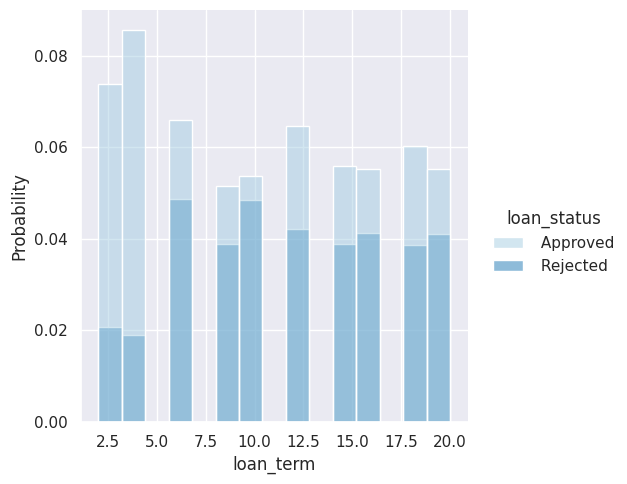

In [ ]:
sns.displot(df, x="loan_term", hue="loan_status", stat="probability")

The `loan_term` for the rejected applications tend to be left skewed, while the approved applications tend to be right skewed. If the loan term is short, there is a high chance of approval. Thus, `loan_term` may play a role in determining `loan_status`.

### Relation between `cibil_score` and `loan_status`

Let's see the distribution of `cibil_score`.

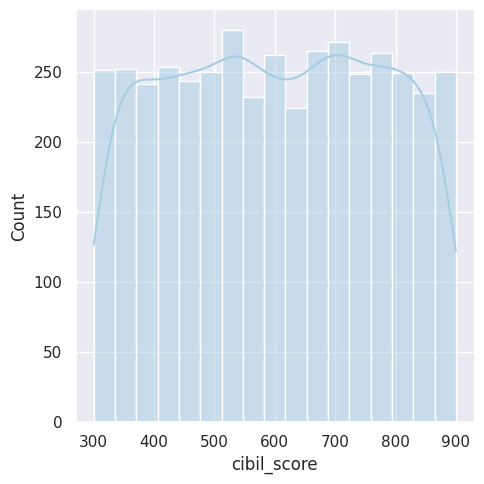

In [ ]:
sns.displot(df, x="cibil_score", kde=True)

Now, let's see the relation between `cibil_score` and `loan_term`.

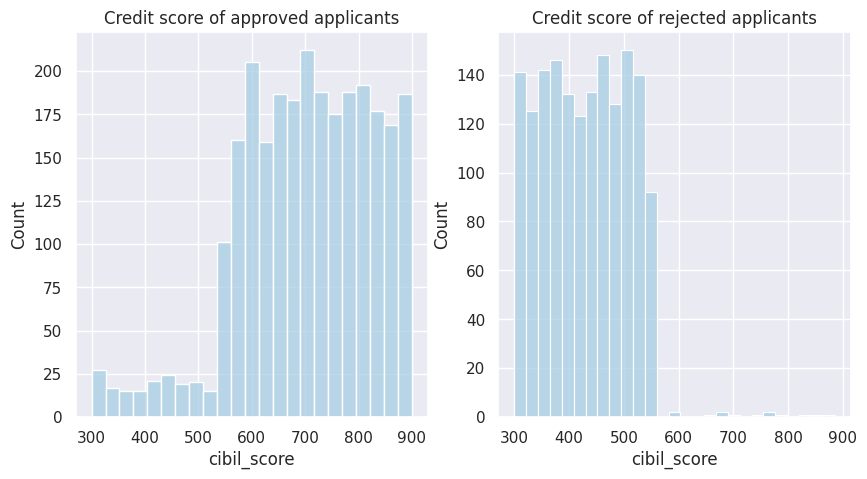

In [ ]:
f,ax=plt.subplots(1, 2, figsize=(10,5))
sns.histplot(df[df['loan_status'] == ' Approved'].cibil_score,ax=ax[0])
ax[0].set_title('Credit score of approved applicants')
sns.histplot(df[df['loan_status'] == ' Rejected'].cibil_score,ax=ax[1])
ax[1].set_title('Credit score of rejected applicants')
plt.show()

From the graphs above, we can clearly see that the credit score of approved applications is heavily left skewed, while the credit score of rejected applications is heavily right skewed.

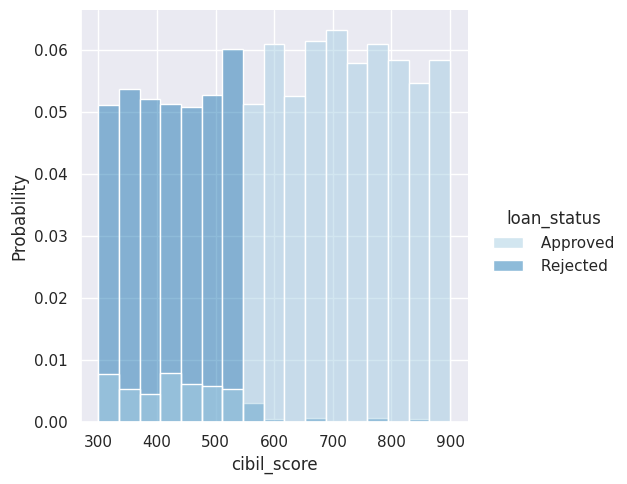

In [ ]:
sns.displot(df, x="cibil_score", hue="loan_status", stat="probability")

The probability histogram above shows that `cibil_score` affects the `loan_status` greatly. If the `cibil_score` is above 500, there is a really high probability of approval. Meanwhile, if the `cibil_score` is below 500, there is a high probability of rejection.

### Relation Between `residential_assets_value` and `loan_status`

Let's see the distribution of `residential_assets_value`.

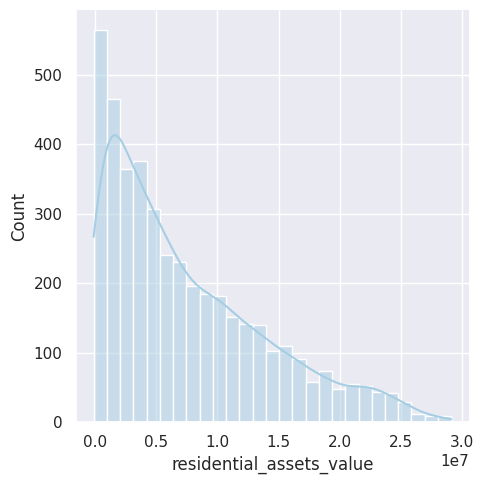

In [ ]:
sns.displot(df, x="residential_assets_value", kde=True)

As we can see, the distribution is heavily right skewed.

Now, let's find out the relation between `residential_assets_value` and `loan_status`.

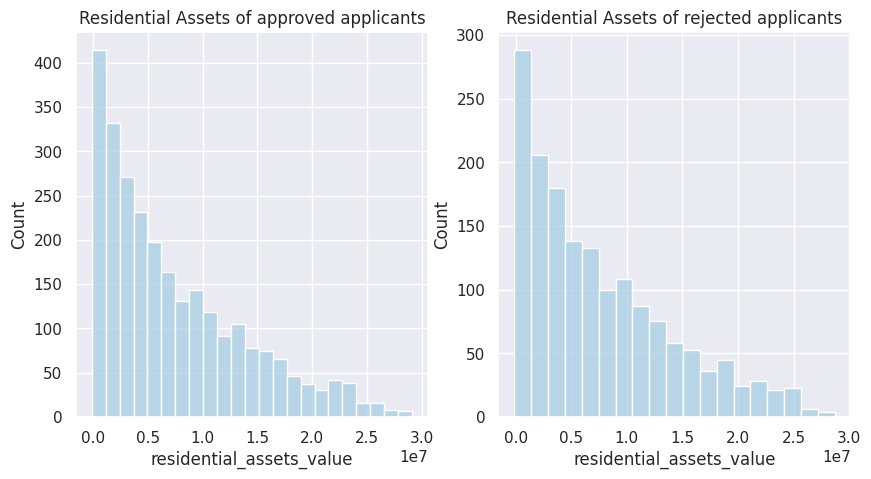

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df[df['loan_status'] == ' Approved'].residential_assets_value, ax=ax[0])
ax[0].set_title('Residential Assets of approved applicants')
sns.histplot(df[df['loan_status'] == ' Rejected'].residential_assets_value, ax=ax[1])
ax[1].set_title('Residential Assets of rejected applicants')
plt.show()

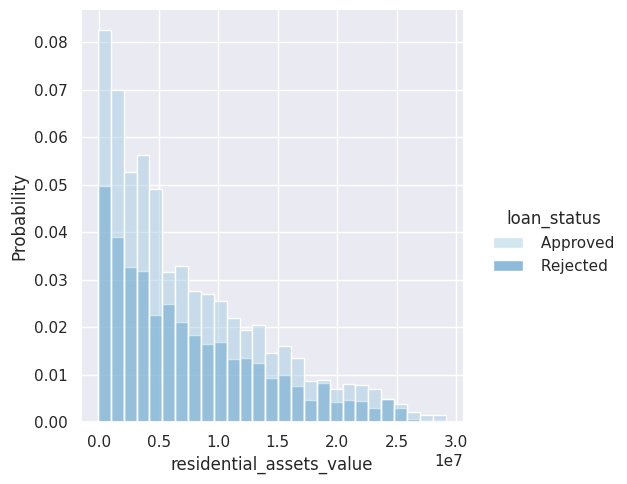

In [ ]:
sns.displot(df, x="residential_assets_value", hue="loan_status", stat="probability")

Both of the histogram is heavily right skewed and have similar distribution shape. However, it seems that the `residential_assets_value` does not really determine the outcome of the `loan_status`.

### Relation Between `commercial_assets_value` and `loan_status`

Let's see the distribution of `commercial_assets_value`.

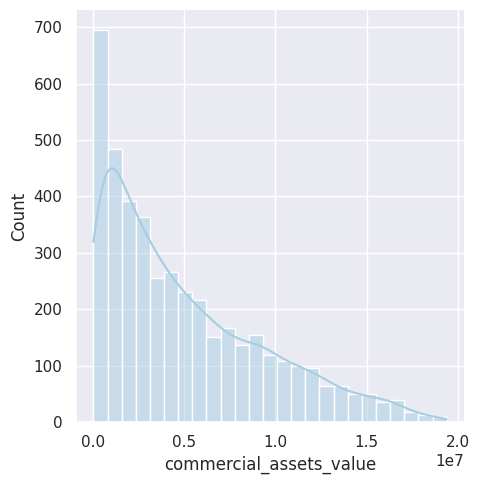

In [ ]:
sns.displot(df, x="commercial_assets_value", kde=True)

The distribution of `commercial_assets_value` is heavily right skewed.

Now, let's see the relation between `commercial_assets_value` and `loan_status`.

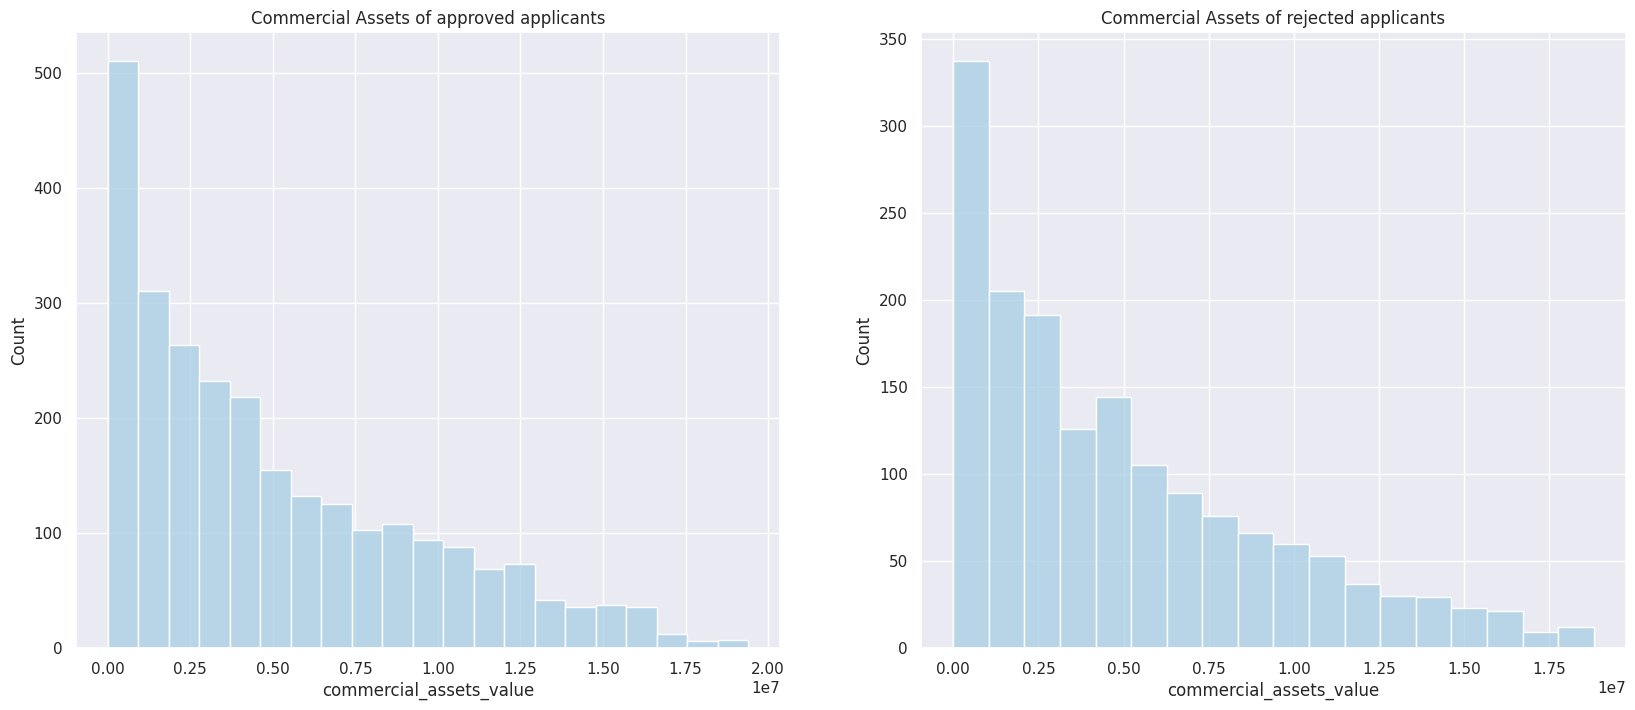

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(20,8))
sns.histplot(df[df['loan_status'] == ' Approved'].commercial_assets_value,ax = ax[0])
ax[0].set_title('Commercial Assets of approved applicants')
sns.histplot(df[df['loan_status'] == ' Rejected'].commercial_assets_value,ax = ax[1])
ax[1].set_title('Commercial Assets of rejected applicants')
plt.show()

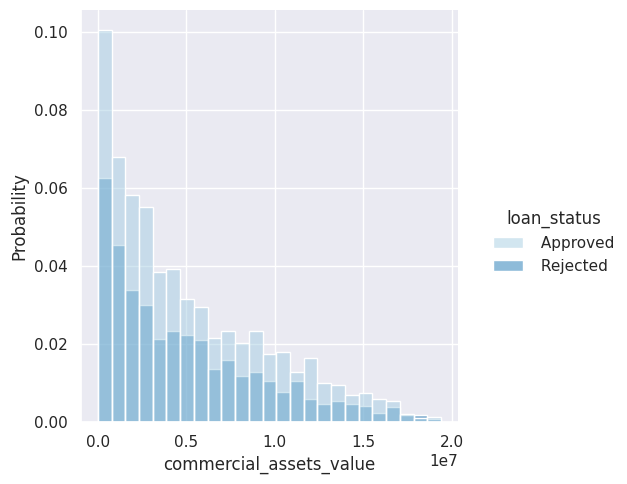

In [ ]:
sns.displot(df, x="commercial_assets_value", hue="loan_status", stat="probability")

Both of the histogram is heavily right skewed and have similar distribution shape. However, it seems that the `commercial_assets_value` does not really determine the outcome of the `loan_status`.

### Relation Between `luxury_assets_value` and `loan_status`

Let's find out the distribution of `luxury_assets_value`.

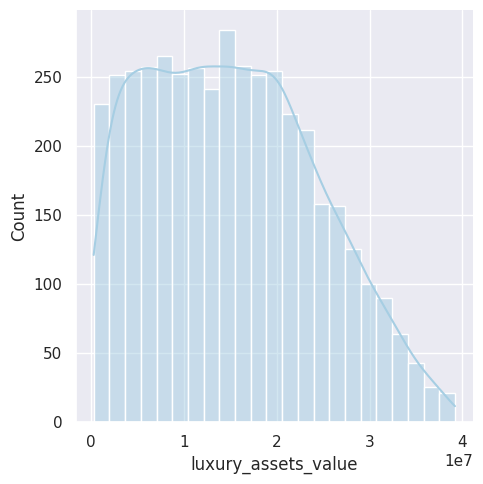

In [ ]:
sns.displot(df, x="luxury_assets_value", kde=True)

Similar to other histograms before, the histogram above is also right skewed.

Now, let's see the relation between `luxury_assets_value` and `loan_status`.

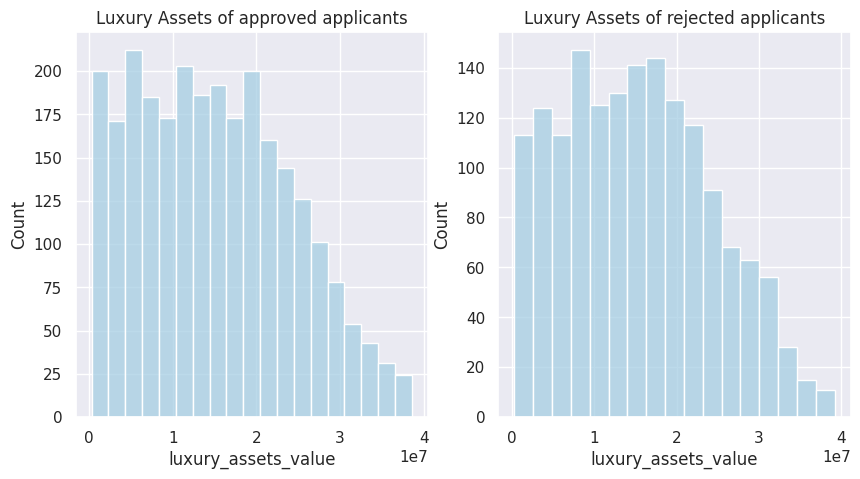

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df[df['loan_status'] == ' Approved'].luxury_assets_value, ax=ax[0])
ax[0].set_title('Luxury Assets of approved applicants')
sns.histplot(df[df['loan_status'] == ' Rejected'].luxury_assets_value, ax=ax[1])
ax[1].set_title('Luxury Assets of rejected applicants')
plt.show()

Both of the histogram is heavily right skewed and have a similar shape of distribution.

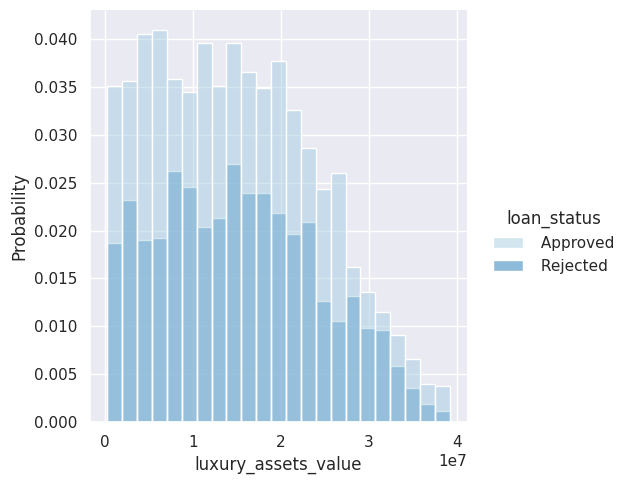

In [ ]:
sns.displot(df, x="luxury_assets_value", hue="loan_status", stat="probability")

In conclusion, `luxury_assets_value` does not really affect `loan_status`.

### Relation Between `bank_asset_value` and `loan_status`

Let's find out the distribution of `bank_asset_value`.

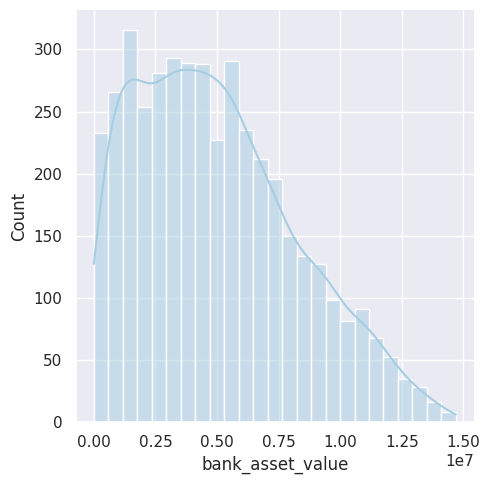

In [ ]:
sns.displot(df, x="bank_asset_value", kde=True)

Similar to the histogram before, this histogram is also right skewed.

Now, let's see the relation between `bank_asset_value` and `loan_status`.

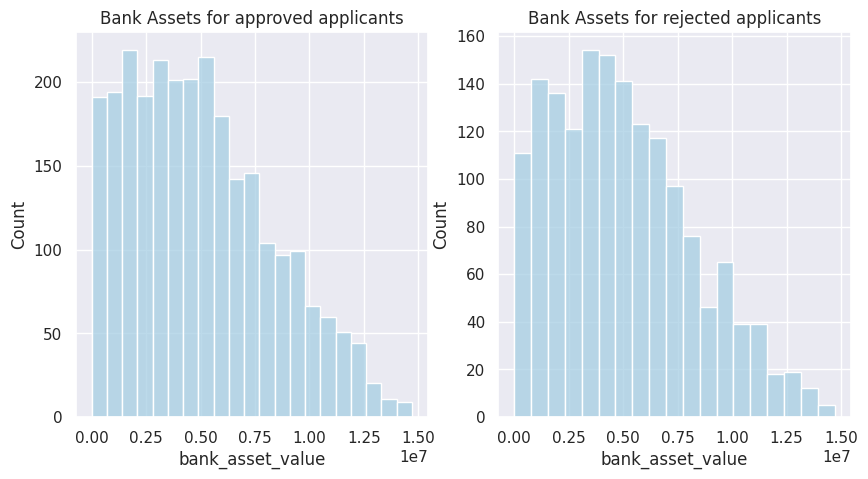

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df[df['loan_status'] == ' Approved'].bank_asset_value, ax=ax[0])
ax[0].set_title('Bank Assets for approved applicants')
sns.histplot(df[df['loan_status'] == ' Rejected'].bank_asset_value, ax=ax[1])
ax[1].set_title('Bank Assets for rejected applicants')
plt.show()

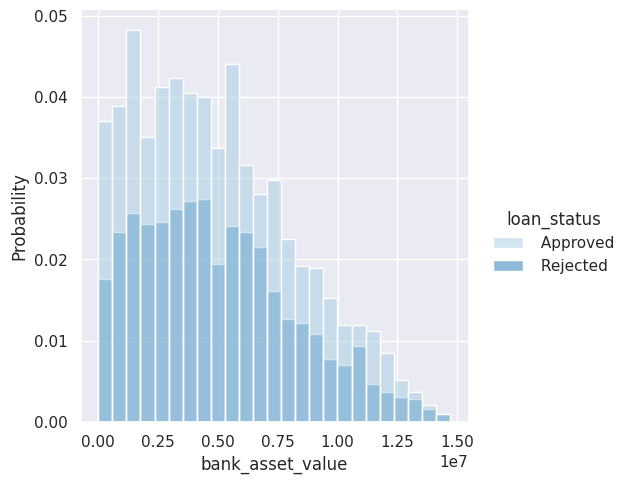

In [ ]:
sns.displot(df, x="bank_asset_value", hue="loan_status", stat="probability")

From the probability distribution above, it can be seen the approval probability is always higher than the rejection probability. However, as the `bank_asset_value` is getting higher, the chance of getting rejection is higher.

### Heatmap

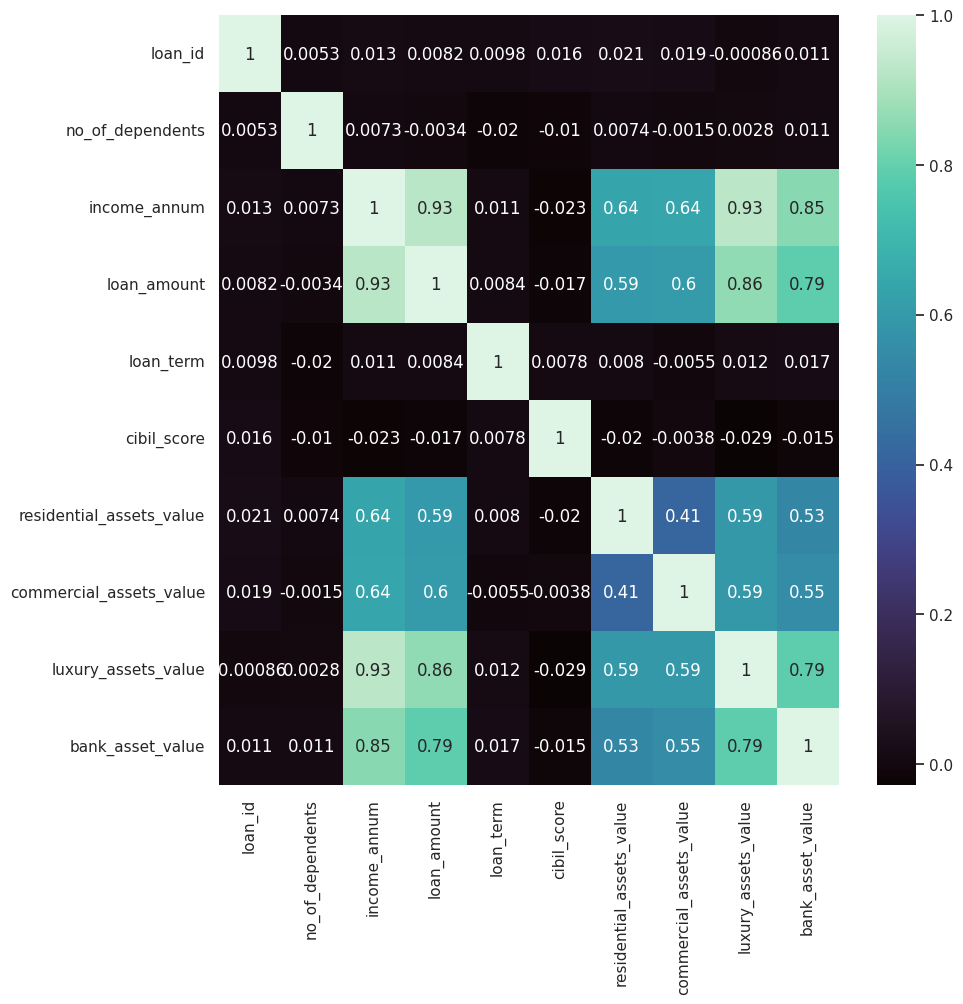

In [ ]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='mako')
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

### Scatter plot for highly correlated features

Text(0.5, 1.0, 'loan_amount x bank_asset_value')

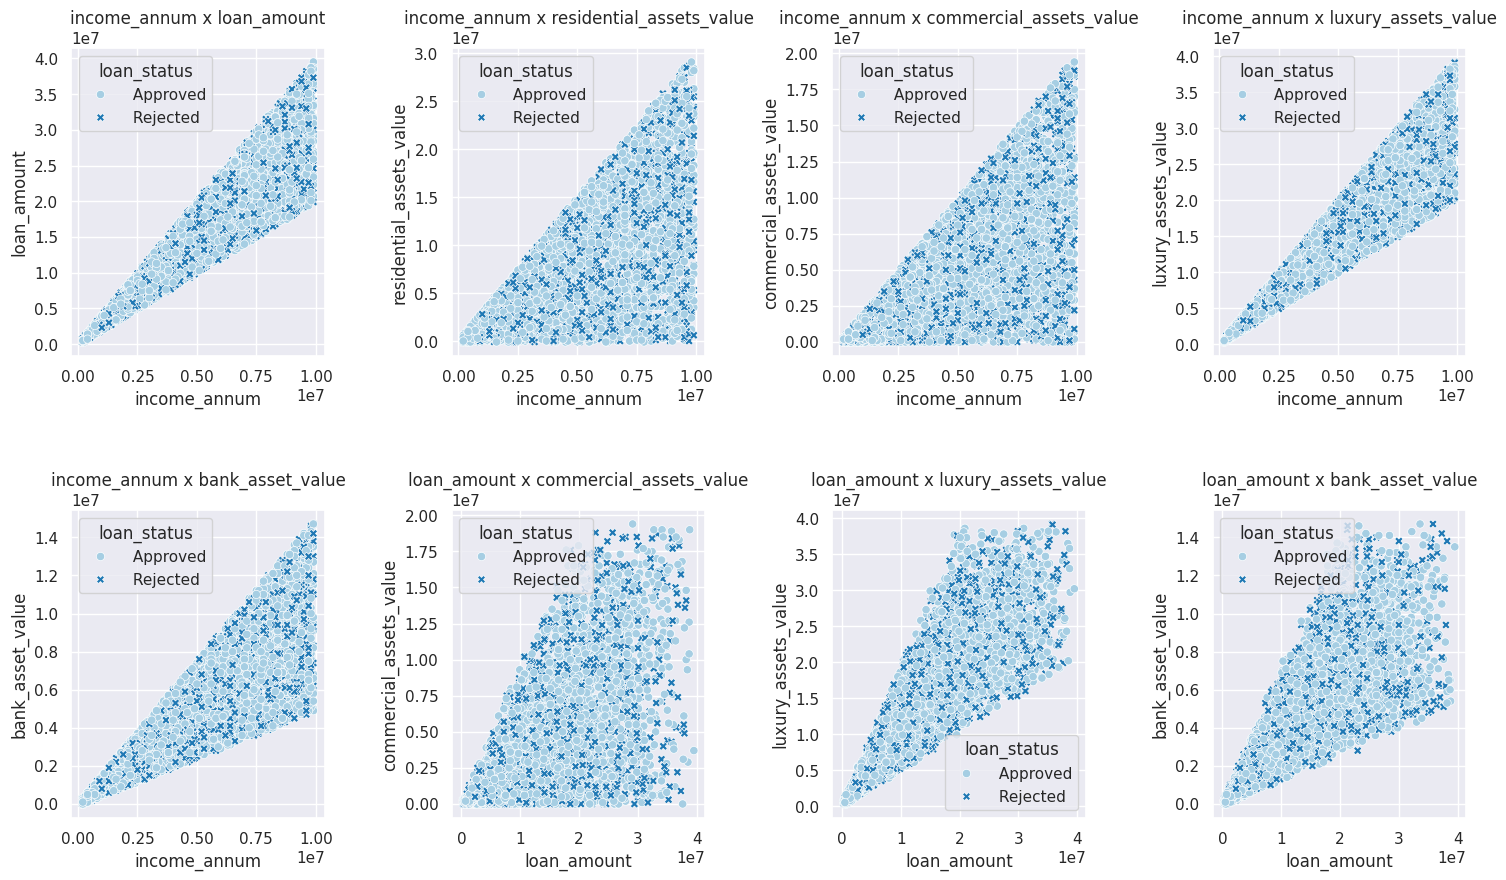

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(18, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.scatterplot(ax=ax[0][0], data=df, x="income_annum", y="loan_amount", hue="loan_status", style="loan_status")
ax[0][0].set_title("income_annum x loan_amount")

sns.scatterplot(ax=ax[0][1], data=df, x="income_annum", y="residential_assets_value", hue="loan_status", style="loan_status")
ax[0][1].set_title("income_annum x residential_assets_value")

sns.scatterplot(ax=ax[0][2], data=df, x="income_annum", y="commercial_assets_value", hue="loan_status", style="loan_status")
ax[0][2].set_title("income_annum x commercial_assets_value")

sns.scatterplot(ax=ax[0][3], data=df, x="income_annum", y="luxury_assets_value", hue="loan_status", style="loan_status")
ax[0][3].set_title("income_annum x luxury_assets_value")

sns.scatterplot(ax=ax[1][0], data=df, x="income_annum", y="bank_asset_value", hue="loan_status", style="loan_status")
ax[1][0].set_title("income_annum x bank_asset_value")

sns.scatterplot(ax=ax[1][1], data=df, x="loan_amount", y="commercial_assets_value", hue="loan_status", style="loan_status")
ax[1][1].set_title("loan_amount x commercial_assets_value")

sns.scatterplot(ax=ax[1][2], data=df, x="loan_amount", y="luxury_assets_value", hue="loan_status", style="loan_status")
ax[1][2].set_title("loan_amount x luxury_assets_value")

sns.scatterplot(ax=ax[1][3], data=df, x="loan_amount", y="bank_asset_value", hue="loan_status", style="loan_status")
ax[1][3].set_title("loan_amount x bank_asset_value")

From the graphs above, we can see that `income_annum` is highly correlated with `luxury_assets_value` and `bank_asset_value`. Hence, we can drop both of `luxury_assets_value` and `bank_asset_value` in the data preprocessing step.

## Data Preprocessing

In [ ]:
new_df = df.copy()

**Encoding**

We are going to change string data into numerical category data by using encoder.

In [ ]:
new_df["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [ ]:
def encodeGraduate(x):
  if x == ' Graduate':
    return 1
  else:
    return 0

In [ ]:
def encodeEmployed(x):
  if x == ' Yes':
    return 1
  else:
    return 0

In [ ]:
def encodeLabel(x):
  if x == ' Approved':
    return 1
  else:
    return 0

In [ ]:
new_df['education'] = new_df['education'].apply(encodeGraduate)
new_df['self_employed'] = new_df['self_employed'].apply(encodeEmployed)
new_df['loan_status'] = new_df['loan_status'].apply(encodeLabel)

In [ ]:
new_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


**Drop some features**

Based on the EDA analysis, we are going to drop some unimportant features, that are `loan_id`, `luxury_assets_value`, and `bank_asset_value`.

`loan_id` is unique identifier to each entry, so it is not needed in the training process. `luxury_assets_value` and `bank_asset_value` have high correlation with each other and other variables like `income_annum` and `loan_amount`. Thus, we drop those features.

In [ ]:
X = new_df.drop(["loan_id", "loan_status", "luxury_assets_value", "bank_asset_value"], axis=1)
y = new_df["loan_status"]

**Split the dataset**

We split the dataset into 70% training data and 30% testing data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Standardize Numerical Features**

Standradize the numerical features to balance the effect of each feature.

In [ ]:
ct = ColumnTransformer([("Standardizer", StandardScaler(), ["no_of_dependents", "income_annum", "loan_amount", "cibil_score", "residential_assets_value", "commercial_assets_value"])], remainder='passthrough')
X_train = pd.DataFrame(ct.fit_transform(X_train), columns=ct.get_feature_names_out())
X_test = pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())

In [ ]:
X_train.head()

,Standardizer__no_of_dependents,Standardizer__income_annum,Standardizer__loan_amount,Standardizer__cibil_score,Standardizer__residential_assets_value,Standardizer__commercial_assets_value,remainder__education,remainder__self_employed,remainder__loan_term
0,0.935713,-0.808048,-0.760014,-1.269743,-0.649068,-0.882954,0.0,0.0,14.0
1,0.342102,1.709476,0.571163,1.522503,2.872098,-0.311579,0.0,1.0,4.0
2,0.935713,-0.559841,-0.495979,1.626347,-1.106362,-0.608694,1.0,1.0,8.0
3,0.342102,0.468443,0.857201,-0.467838,0.707572,1.471111,0.0,0.0,8.0
4,-0.251510,-0.630757,-0.936037,1.407121,-0.938688,-0.083029,1.0,1.0,8.0


In [ ]:
X_test.head()

,Standardizer__no_of_dependents,Standardizer__income_annum,Standardizer__loan_amount,Standardizer__cibil_score,Standardizer__residential_assets_value,Standardizer__commercial_assets_value,remainder__education,remainder__self_employed,remainder__loan_term
0,1.529325,0.113862,0.494152,-1.027441,-0.146044,1.151141,1.0,0.0,20.0
1,-0.251510,0.291153,-0.132931,-0.012079,-0.420421,1.036866,1.0,0.0,8.0
2,0.342102,1.603102,0.516155,-0.860137,-0.496637,2.568151,1.0,0.0,14.0
3,-0.251510,0.397527,0.901206,0.022536,0.387466,1.333981,1.0,0.0,8.0
4,0.342102,0.255695,-0.121929,0.789827,0.646599,-0.128739,0.0,1.0,12.0


## Training

Below is the function for model evaluation.

In [ ]:
def evaluation(y_test, y_pred):
  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # Calculate precision, recall, and F1 score
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  # Generate a classification report
  classification_rep = classification_report(y_test, y_pred)

  # Generate a confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Plot the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

  # Print evaluation metrics separately
  print("Ensemble Classifier Metrics:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)

  # Print the classification report
  print("Classification Report:\n", classification_rep)


### XGBoost

In [ ]:
chosen_n = -1
max_acc = 0
for curr_n in range(2, 30):
  # declare parameters
  params = {
              'objective':'binary:logistic',
              'max_depth': 4,
              'alpha': 10,
              'learning_rate': 1.0,
              'n_estimators': curr_n
          }

  # instantiate the classifier
  xgb_clf = XGBClassifier(**params)

  # fit the classifier to the training data
  xgb_clf.fit(X_train, y_train)

  # make predictions on test data
  y_pred = xgb_clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f'XGBoost model accuracy score for max depth {curr_n}: {acc}')

  if acc > max_acc:
    max_acc = acc
    chosen_n = curr_n

XGBoost model accuracy score for max depth 2: 0.9617486338797814
XGBoost model accuracy score for max depth 3: 0.9664324746291959
XGBoost model accuracy score for max depth 4: 0.9695550351288056
XGBoost model accuracy score for max depth 5: 0.9687743950039032
XGBoost model accuracy score for max depth 6: 0.9695550351288056
XGBoost model accuracy score for max depth 7: 0.9695550351288056
XGBoost model accuracy score for max depth 8: 0.9695550351288056
XGBoost model accuracy score for max depth 9: 0.9695550351288056
XGBoost model accuracy score for max depth 10: 0.9695550351288056
XGBoost model accuracy score for max depth 11: 0.9695550351288056
XGBoost model accuracy score for max depth 12: 0.9695550351288056
XGBoost model accuracy score for max depth 13: 0.9695550351288056
XGBoost model accuracy score for max depth 14: 0.9695550351288056
XGBoost model accuracy score for max depth 15: 0.9695550351288056
XGBoost model accuracy score for max depth 16: 0.9695550351288056
XGBoost model accu

In [ ]:
print(f"Final N Estimators: {chosen_n}")

Final N Estimators: 4


In [ ]:
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':chosen_n
        }

xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# make predictions on test data
y_pred = xgb_clf.predict(X_test)

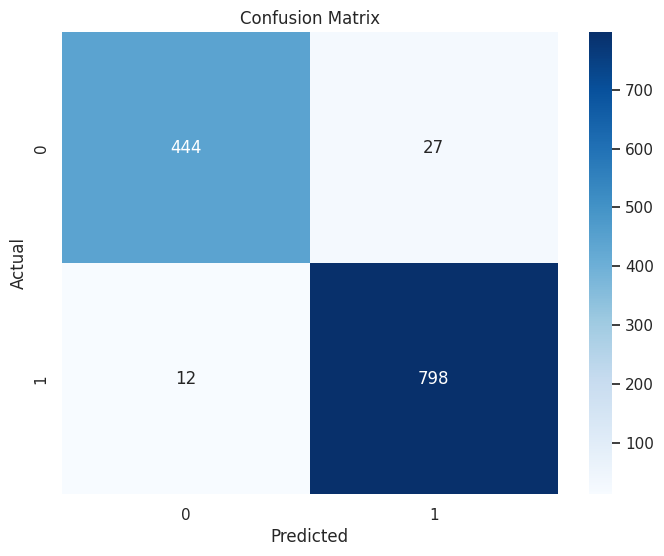

Ensemble Classifier Metrics:
Accuracy: 0.9695550351288056
Precision: 0.9696301110451241
Recall: 0.9695550351288056
F1 Score: 0.9694483724449542
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       471
           1       0.97      0.99      0.98       810

    accuracy                           0.97      1281
   macro avg       0.97      0.96      0.97      1281
weighted avg       0.97      0.97      0.97      1281



In [ ]:
evaluation(y_test, y_pred)

In [ ]:
pl = Pipeline(steps=[
    ('standardizer', ct), # ct has been declared on above cells (on data processing)
    ('model', XGBClassifier(**params))
])
scores = cross_val_score(pl, X, y, cv=10, scoring='accuracy')
print(f"Ten fold Cross Validation Score: {scores}")
print(f"Average Score = {np.mean(scores)}")

Ten fold Cross Validation Score: [0.97892272 0.98360656 0.96721311 0.96721311 0.9882904  0.9765808
 0.96955504 0.97423888 0.96721311 0.98591549]
Average Score = 0.9758749216611141


### Random Forest Classifier

In [ ]:
chosen_depth = -1
max_acc = 0
for mx_depth in range(2, 30):
  rf = RandomForestClassifier(max_depth=mx_depth, random_state=0)
  rf.fit(X_train, y_train)
  y_pred2 = rf.predict(X_test)

  acc = accuracy_score(y_test, y_pred2)
  print(f'Random Forest model accuracy score for max depth {mx_depth}: {acc}')

  if acc > max_acc:
    max_acc = acc
    chosen_depth = mx_depth

Random Forest model accuracy score for max depth 2: 0.9500390320062451
Random Forest model accuracy score for max depth 3: 0.9492583918813428
Random Forest model accuracy score for max depth 4: 0.960967993754879
Random Forest model accuracy score for max depth 5: 0.9648711943793911
Random Forest model accuracy score for max depth 6: 0.9679937548790007
Random Forest model accuracy score for max depth 7: 0.9726775956284153
Random Forest model accuracy score for max depth 8: 0.970335675253708
Random Forest model accuracy score for max depth 9: 0.9773614363778298
Random Forest model accuracy score for max depth 10: 0.975800156128025
Random Forest model accuracy score for max depth 11: 0.975800156128025
Random Forest model accuracy score for max depth 12: 0.9765807962529274
Random Forest model accuracy score for max depth 13: 0.9781420765027322
Random Forest model accuracy score for max depth 14: 0.975800156128025
Random Forest model accuracy score for max depth 15: 0.9750195160031225
Rando

In [ ]:
print(f"Final Max Depth: {chosen_depth}")

Final Max Depth: 13


In [ ]:
rf = RandomForestClassifier(max_depth=chosen_depth, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, random_state=0)

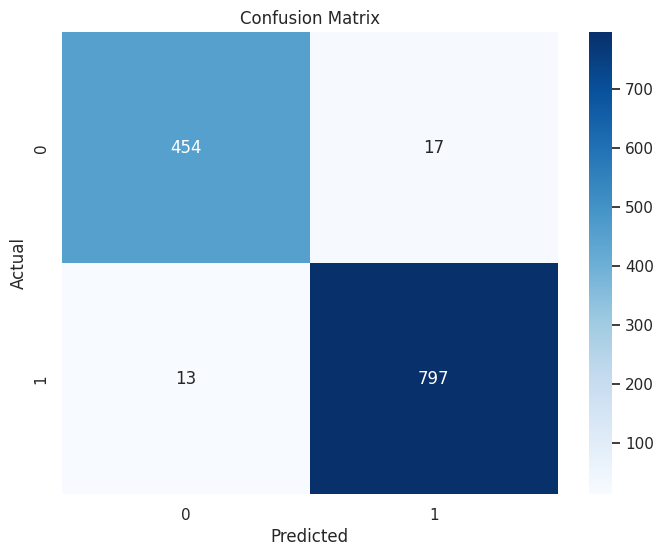

Ensemble Classifier Metrics:
Accuracy: 0.9765807962529274
Precision: 0.9765590859072096
Recall: 0.9765807962529274
F1 Score: 0.9765597033005048
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       471
           1       0.98      0.98      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.97      0.97      1281
weighted avg       0.98      0.98      0.98      1281



In [ ]:
evaluation(y_test, y_pred2)

In [ ]:
pl = Pipeline(steps=[
    ('standardizer', ct), # ct has been declared on above cells (on data processing)
    ('model', RandomForestClassifier(max_depth=chosen_depth))
])
scores = cross_val_score(pl, X, y, cv=10, scoring='accuracy')
print(f"Ten fold Cross Validation Score: {scores}")
print(f"Average Score = {np.mean(scores)}")

Ten fold Cross Validation Score: [0.97892272 0.98360656 0.97423888 0.98126464 0.98360656 0.98360656
 0.97892272 0.98126464 0.98126464 0.98591549]
Average Score = 0.981261338522941


### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred3 = lr.predict(X_test)

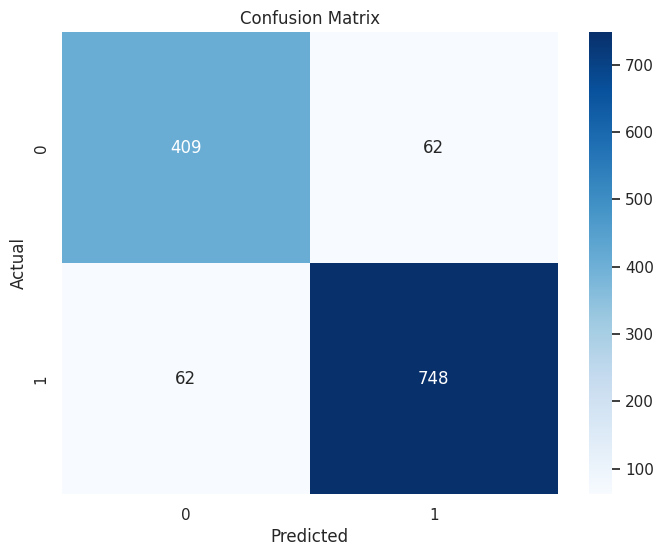

Ensemble Classifier Metrics:
Accuracy: 0.9032006245120999
Precision: 0.9032006245120999
Recall: 0.9032006245120999
F1 Score: 0.9032006245120999
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       471
           1       0.92      0.92      0.92       810

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281



In [ ]:
evaluation(y_test, y_pred3)

In [ ]:
pl = Pipeline(steps=[
    ('standardizer', ct), # ct has been declared on above cells (on data processing)
    ('model', LogisticRegression())
])
scores = cross_val_score(pl, X, y, cv=10, scoring='accuracy')
print(f"Ten fold Cross Validation Score: {scores}")
print(f"Average Score = {np.mean(scores)}")

Ten fold Cross Validation Score: [0.92740047 0.92740047 0.92505855 0.91803279 0.92974239 0.90163934
 0.91803279 0.91569087 0.90632319 0.90610329]
Average Score = 0.9175424129476312


### Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred4 = gnb.predict(X_test)

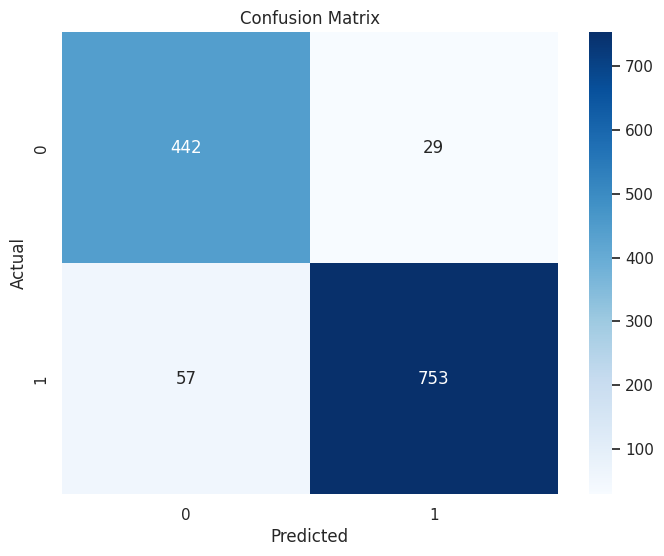

Ensemble Classifier Metrics:
Accuracy: 0.9328649492583919
Precision: 0.9345511581750442
Recall: 0.9328649492583919
F1 Score: 0.9332435251415823
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       471
           1       0.96      0.93      0.95       810

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281



In [ ]:
evaluation(y_test, y_pred4)

In [ ]:
pl = Pipeline(steps=[
    ('standardizer', ct), # ct has been declared on above cells (on data processing)
    ('model', GaussianNB())
])
scores = cross_val_score(pl, X, y, cv=10, scoring='accuracy')
print(f"Ten fold Cross Validation Score: {scores}")
print(f"Average Score = {np.mean(scores)}")

Ten fold Cross Validation Score: [0.93442623 0.94379391 0.93442623 0.92974239 0.93911007 0.93442623
 0.94613583 0.92740047 0.91100703 0.92957746]
Average Score = 0.9330045848863675


## Conclusion

After trying several models, we find out that Random Forest Classifier gives the best accuracy for our case.

Here, we make a pipeline to make things simple. We train our model with the whole dataset without spliting it.

In [ ]:
model = Pipeline(steps=[
    ('standardizer', ct), # ct has been declared on above cells (on data processing)
    ('model', RandomForestClassifier(max_depth=chosen_depth))
])
model.fit(X, y)

Pipeline(steps=[('standardizer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Standardizer',
                                                  StandardScaler(),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'cibil_score',
                                                   'residential_assets_value',
                                                   'commercial_assets_value'])])),
                ('model', RandomForestClassifier(max_depth=13))])

In [ ]:
something = pd.DataFrame([['0', '1', '1', '800000', '2200000', '20', '782', '1300000', '800000']])
something.columns = X.columns
# some_y = model.predict(something)
some_pl = Pipeline(steps=[
    ('standardizer', ct) # ct has been declared on above cells (on data processing)
])
some_pl.fit(X)
res = some_pl.transform(something)
print(res)

[[-1.4735476024106673 -1.5175867177230307 -1.4303269209647227
  1.0559928894805115 -0.9492134961401286 -0.9509401714840066 '1' '1' '20']]


In [ ]:
filename = "model_rf.pkl"
pickle.dump(model, open(filename, 'wb'))

In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

That is the end of our "Bank Loan Approval Classification".

Thank you for reading our work! 😀